In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
data=load_breast_cancer()
X,y=data.data,data.target

X_scale=StandardScaler().fit_transform(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scale)

In [ ]:
print("Explained variance ration:",pca.explained_variance_ratio_)
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

model=Sequential()
model.add(Dense(16,input_dim=2,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Explained variance ration: [0.44272026 0.18971182]
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5979 - loss: 0.9635 - val_accuracy: 0.6228 - val_loss: 0.8353
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6539 - loss: 0.7424 - val_accuracy: 0.6228 - val_loss: 0.6915
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6397 - loss: 0.6241 - val_accuracy: 0.7193 - val_loss: 0.5705
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6479 - loss: 0.5757 - val_accuracy: 0.7632 - val_loss: 0.4655
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6975 - loss: 0.4591 - val_accuracy: 0.8070 - val_loss: 0.3868
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8029 - loss: 0.3630 - val_accuracy: 0.8860 - val_loss: 0.3248
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8800 - loss: 0.3276 - val_accuracy: 0.9561 - val_loss: 0.2750
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9109 - loss: 0.3010 - val_accuracy: 0.9825 - val_los

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Confusion Matrix:
[[42  1]
 [ 0 71]]
Number of False Positives: 1


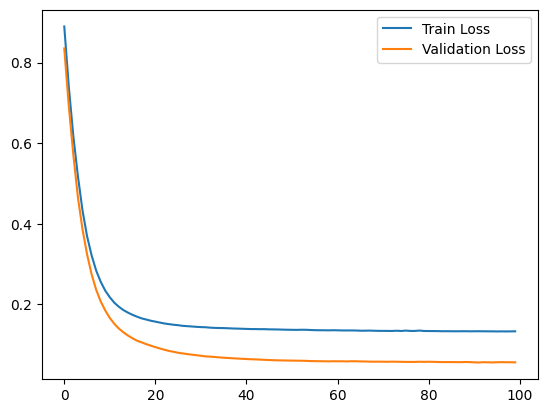

0.9450549483299255


In [ ]:
# Evaluate on test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
false_positives = cm[0, 1]

print("Confusion Matrix:")
print(cm)
print(f"Number of False Positives: {false_positives}")

# Optional: Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
print(history.history['accuracy'][-1])

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6308 - loss: 0.6847 - val_accuracy: 0.6228 - val_loss: 0.6388
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6309 - loss: 0.6105 - val_accuracy: 0.6140 - val_loss: 0.5806
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6408 - loss: 0.5693 - val_accuracy: 0.6579 - val_loss: 0.5322
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7162 - loss: 0.5069 - val_accuracy: 0.8070 - val_loss: 0.4909
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8631 - loss: 0.4761 - val_accuracy: 0.8509 - val_loss: 0.4547
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8727 - loss: 0.4515 - val_accuracy: 0.8772 - val_loss: 0.4190
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8714 - loss: 0.4355 - val_accuracy: 0.9123 - val_loss: 0.3853
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8803 - loss: 0.3973 - val_accuracy: 0.9211 - val_l

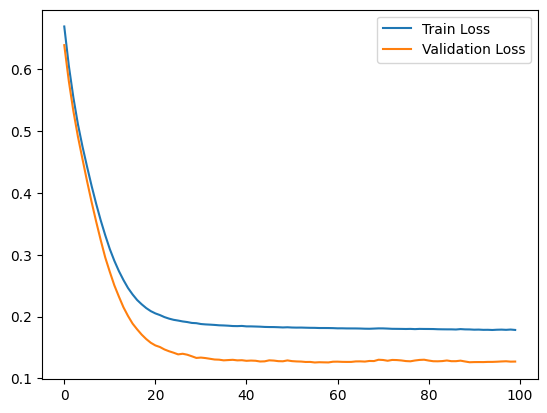

In [2]:

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

data1=pd.read_csv('/content/data.csv')
print(data1)
data1['diagnosis']=data1['diagnosis'].map({'M':1,'B':0})
print(data1['diagnosis'])
data1['target']=data1['diagnosis']
print(data1.head())

X=data1[['radius_mean','texture_mean','perimeter_mean','smoothness_mean','compactness_mean']].values
print("The train data:",X)
y=data1['diagnosis'].values
print(y)

X_scale=StandardScaler().fit_transform(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scale)

print(X_pca.shape)
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

model=Sequential()
model.add(Dense(16,input_dim=2,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_classes)
false_positives = cm[0, 1]

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
